# Integration of SVM and MVO 

This notebook computes and visualizes the results of the computational experiments

In [41]:
import numpy as np
from pandas.tseries.offsets import Day, MonthBegin
pth = 'cache/Experiments/'
local_path = 'cache/Local Experiments/'
cache_path = 'cache/'
img_path = "Images/"
from python.packages import *
from python.analysis_tools import *
import pickle
%matplotlib inline
dpi_setting = 150

In [42]:
## Import Monthly Returns
rets = pd.read_pickle(cache_path + "RETS.pkl")
## Import feature vectors
wrds_svm = pd.read_pickle(cache_path + "WRDS_ASOF.pkl")
## Import Daily Prices
Prices = pd.read_pickle(cache_path + "Daily_Prices.pkl")
## Get the trade dates
StockDates = wrds_svm.reset_index().loc[:, ['Date', 'MonthStart', 'MonthEnd']].drop_duplicates()

  #risk free rate data
FF_RiskFree = pd.read_csv(cache_path + "F-F_Research_Data_Factors.CSV")
FF_RiskFree.Date = pd.to_datetime(FF_RiskFree['Date'], format='%Y%m', errors='coerce')
FF_RiskFree.index = FF_RiskFree.Date
FF_RiskFree.drop(FF_RiskFree.columns[0:4], axis=1, inplace = True)


In [43]:
daily_rets = Prices.pct_change() + 1
new_index = daily_rets.index[0:-1] #VERY IMPORTANT
daily_rets.drop(daily_rets.head(1).index,inplace=True)
daily_rets.index = new_index
Prices['StartMonth'] = Prices.index + Day(1) + MonthBegin(-1)
#this calculate the month of the stock returns
daily_rets['StartMonth'] = daily_rets.index + Day(1) + MonthBegin(-1)
# daily_rets[['AAPL', 'StartMonth']].head()
# daily_rets.dropna(inplace = True)
# daily_rets.head()

In [44]:
# daily_portfolio = pd.merge(weights_mvo, daily_rets.reset_index()[['Date', 'StartMonth']], how='left', left_index = True, right_on = 'StartMonth')
# daily_portfolio.index = daily_portfolio.Date
#Rets.index.isin(StockDates.MonthStart.values)
(daily_rets).groupby('StartMonth').prod().iloc[8:].head() - 1

,AAPL,ABC,ABMD,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WMB,WMT,WY,XEL,XLNX,XOM,XRAY,XRX,YUM,ZBRA
StartMonth,,,,,,,,,,,,,,,,,,,,,
2000-07-01,-0.075030,0.149590,0.194030,-0.043729,-0.105083,-0.184231,-0.018750,-0.034648,-0.424388,0.071684,...,0.040179,-0.041758,0.080448,0.132415,-0.166544,0.005695,0.142562,-0.245399,-0.098253,0.158960
2000-08-01,0.286440,-0.007130,0.565625,0.025185,0.182414,0.552152,-0.058899,0.194307,0.386707,0.076923,...,0.086912,-0.105505,-0.053455,0.119107,0.294014,0.036879,0.014466,0.069129,0.157385,0.062344
2000-09-01,-0.617734,0.412926,0.045908,0.108381,0.204822,-0.171393,0.042857,0.076122,-0.128540,0.072135,...,-0.088809,-0.050227,-0.165289,0.100985,-0.051700,0.108334,-0.003583,-0.057692,0.031381,-0.167840
2000-10-01,-0.154641,-0.102922,-0.125954,0.107287,-0.052148,-0.291667,0.219178,-0.000965,-0.157850,-0.044117,...,-0.005797,0.009461,0.193338,-0.050657,-0.225969,0.006835,-0.001792,-0.440816,-0.016227,-0.055007
2000-11-01,-0.167680,0.107649,-0.192140,0.000000,-0.128641,-0.119748,0.151331,0.002896,0.285714,0.096923,...,-0.185131,0.096384,0.013947,0.023752,-0.406858,-0.030599,0.086176,-0.264868,0.129897,0.007463


In [45]:
from itertools import product
turnovers = ["1"] #["0_75", "1", "1_25"]
turnover_strings = ["$C_0 = 1.00$"]#["$C_0 = 0.75$", "$C_0 = 1.00$", "$C_0 = 1.25$"]
cardinalities  = ["Card07"] #["Card01", "Card03", "Card05", "Card07", "Card09"]
card_strings = ["$K = 0.7N$"] #["$K = 0.1N$", "$K = 0.3N$", "$K = 0.5N$", "$K = 0.7N$", "$K = 0.9N$"]
epsilons = [1e-3] #[1e-2, 1e-3, 1e-4, 1e-5] # is no SVM consideration
epsilons_desc = {1e-2:"eps negative 2", 1e-3:"eps negative 3", 1e-4:"eps negative 4", 1e-5:"eps negative 5"}

oot_returns_mvo_dict = {}
oot_returns_svm_dict = {}
oot_returns_adm_dict = {}
oot_returns_adm_dict2 = {}

epsilon = 1e-3

for (turnover, card) in product(turnovers, cardinalities):

    with open(local_path + "Standard MVO Portfolios/"+turnover+"no_tlim.pkl",'rb') as fp:
      mvo_results = pickle.load(fp)
    # with open(pth + "svm_oot_results_turnover0_75by6.pkl", 'rb') as fp:
    #   svm_results = pickle.load(fp)
    with open(local_path + epsilons_desc[epsilon] + "/" + card + "_Vol_" +turnover + "no_tlim.pkl", 'rb') as fp:
      svm_results = pickle.load(fp)

    with open(local_path + epsilons_desc[epsilon] + "/" + "padm" +card+ "_INV3PRO6INV1_" +turnover + "no_tlim.pkl", 'rb') as fp:
      adm_results = pickle.load(fp)
    
    with open(local_path + epsilons_desc[epsilon] + "/" + "padm" +card+ "_VolMomentum_" +turnover + "no_neg.pkl", 'rb') as fp:
      adm_results2 = pickle.load(fp)

    weights_mvo, oot_returns_mvo, market_mvo, wis_mvo, bias_mvo, soln_mods_mvo = mvo_results
    weights_svm, oot_returns_svm, market_svm, wis_svm, bias_svm, soln_mods_svm = svm_results
    weights_adm, oot_returns_adm, market_adm, wis_adm, bias_adm, soln_mods_adm, times = adm_results
    weights_adm2, oot_returns_adm2, market_adm2, wis_adm2, bias_adm2, soln_mods_adm2, times2 = adm_results2

    oot_returns_mvo_dict[(card, turnover)] = (weights_mvo.iloc[:-1]*rets).sum(axis = 1)
    oot_returns_svm_dict[(card, turnover)] = (weights_svm.iloc[:-1]*rets).sum(axis = 1)
    oot_returns_adm_dict[(card, turnover)] = (weights_adm.iloc[:-1]*rets).sum(axis = 1)
    oot_returns_adm_dict2[(card, turnover)] = (weights_adm2.iloc[:-1]*rets).sum(axis = 1)
rf = FF_RiskFree[FF_RiskFree.index.isin(oot_returns_adm.index)]
rf = rf.RF;

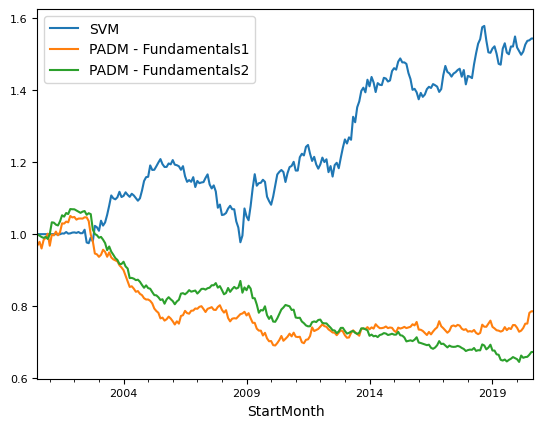

In [46]:
for (i ,j) in product(range(len(cardinalities)), range(len(turnovers))):
    turnover = turnovers[j]
    card = cardinalities[i]
    svm_wealth = wealth(oot_returns_svm_dict[(card, turnover)])
    mvo_wealth = wealth(oot_returns_mvo_dict[(card, turnover)])
    adm_wealth = wealth(oot_returns_adm_dict[(card, turnover)])
    adm_wealth2 = wealth(oot_returns_adm_dict2[(card, turnover)])
    (svm_wealth/mvo_wealth).plot(label = 'SVM', fontsize = 8)
    (adm_wealth/mvo_wealth).plot(label = 'PADM - Fundamentals1', fontsize = 8)
    (adm_wealth2/mvo_wealth).plot(label = 'PADM - Fundamentals2', fontsize = 8)
    
plt.legend()

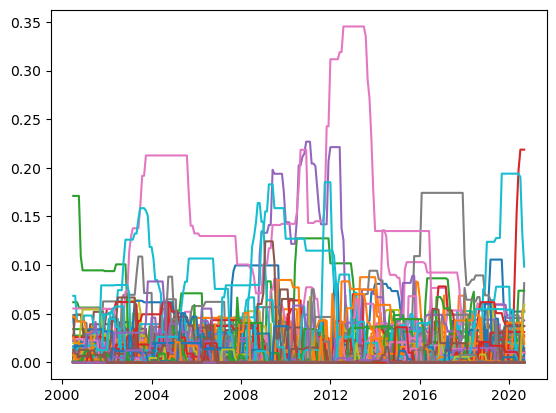

In [100]:
plt.plot(weights_svm)

TypeError: 'AxesSubplot' object is not subscriptable

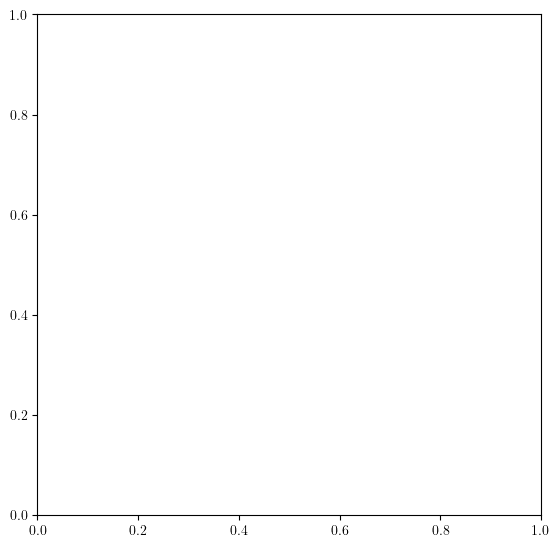

In [26]:
max_y = 0
min_y = 0.8
fig, axs = plt.subplots(len(cardinalities), len(turnovers),
                        sharex=True, sharey = True, figsize=(6.5,6.5))
for (i ,j) in product(range(len(cardinalities)), range(len(turnovers))):
    turnover = turnovers[j]
    card = cardinalities[i]
    svm_wealth = wealth(oot_returns_svm_dict[(card, turnover)])
    mvo_wealth = wealth(oot_returns_mvo_dict[(card, turnover)])
    adm_wealth = wealth(oot_returns_adm_dict[(card, turnover)])
    T = len(adm_wealth)
    (svm_wealth/mvo_wealth).plot(label = 'Exact Solve - Vol', fontsize = 8, ax=axs[i, j])
    (adm_wealth/mvo_wealth).plot(label = 'PADM - Fundamentals', fontsize = 8, ax=axs[i, j])
    card_string = card_strings[i]
    turnover_string = turnover_strings[j]
    axs[i, j].set_title(card_string + ", " + turnover_string, fontsize = 8)
    max_ = max(np.max((adm_wealth/mvo_wealth)), np.max((svm_wealth/mvo_wealth)))
    if max_ > max_y:
        max_y = max_
axs[4, 1].legend(loc='upper center',
             bbox_to_anchor=(0.5, -0.3),
                 fancybox=False,
                 shadow=False, ncol=3,
                 fontsize = 8)

for ax in axs:
    for sub_ax in ax:
        sub_ax.yaxis.set_tick_params(which='minor', bottom=False)
        sub_ax.set_yticks([min_y+i*0.2 for i in range(2+int((max_y - min_y)/0.2))])
        sub_ax.grid()
        sub_ax.set_xlabel("Trade Date",fontsize = 8)
# fig.supxlabel('Trade Date',fontsize = 8)
fig.supylabel("Cumulative Relative Wealth",fontsize = 8)
#plt.setp(axs, yticks = [i*0.2 for i in range(2+int(max_y/0.2))])
#plt.tight_layout()
plt.savefig(img_path + "p12.svg", dpi = dpi_setting)

In [22]:
ax[0]

<AxesSubplot:title={'center':'$K = 0.9N$, $C_0 = 0.75$'}, xlabel='Trade Date'>

In [23]:

plt.figure(figsize = (6,4))
#(wealth(oot_returns_mvo.iloc[:T])/wealth(oot_returns_mvo.iloc[:T])).plot(label = 'MVO');
(wealth(oot_returns_svm.iloc[:T])/wealth(oot_returns_mvo.iloc[:T])).plot(label = 'Exact Solve - Vol',fontsize = 16, axs);
(wealth(oot_returns_adm.iloc[:T])/wealth(oot_returns_mvo.iloc[:T])).plot(label = 'PADM - Fundamentals',fontsize = 16);
#(wealth(oot_returns_mvo.iloc[:T])/wealth(oot_returns_mvo.iloc[:T])).plot(label = 'MVO');
#wealth(rets.iloc[:,:N].max(axis=1)).plot(label = 'Max Possible');
plt.ylabel("Cumulative Relative Wealth",fontsize = 16)
plt.legend(fontsize = 16);
plt.tight_layout()
plt.savefig(img_path + "p12"+turnover+"_"+card+".svg", dpi = dpi_setting)

SyntaxError: positional argument follows keyword argument (1032332196.py, line 3)

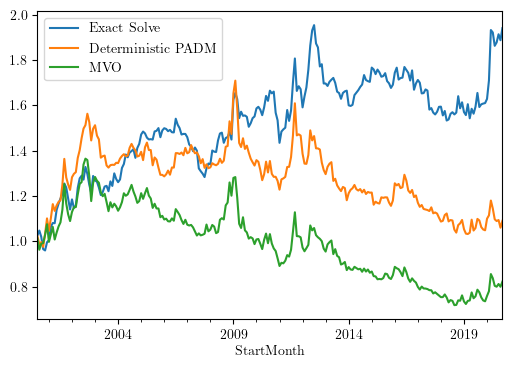

In [47]:
T = len(oot_returns_adm)
plt.figure(figsize = (6,4))
(wealth(oot_returns_svm.iloc[:T])/wealth(market_mvo.iloc[:T])).plot(label = 'Exact Solve');
(wealth(oot_returns_adm.iloc[:T])/wealth(market_mvo.iloc[:T])).plot(label = 'Deterministic PADM');
(wealth(oot_returns_mvo.iloc[:T])/wealth(market_mvo.iloc[:T])).plot(label = 'MVO');
plt.legend();
#(wealth(market_svm.iloc[:T])).plot(label = 'MVO');

In [51]:
pd.DataFrame([RetStats(oot_returns_mvo, rf/100), RetStats(oot_returns_svm, rf/100), RetStats(oot_returns_adm, rf/100)], index = ["MVO", "SVM MVO - Exact", "SVM MVO - ADM"], columns = ["$\mu$", "$\sigma$", "Sharpe Ratio"])

,$\mu$,$\sigma$,Sharpe Ratio
MVO,0.109198,0.120621,0.905300
SVM MVO - Exact,0.152083,0.162085,0.938287
SVM MVO - ADM,0.123299,0.131658,0.936508


In [52]:
print('mvo turnover proxy', weights_mvo.diff().abs().sum(axis = 1).sum())
print('svm turnover proxy', weights_svm.diff().abs().sum(axis = 1).sum())
print('adm turnover proxy', weights_adm.diff().abs().sum(axis = 1).sum())

mvo turnover proxy 50.416693762080726
svm turnover proxy 50.32524136739624
adm turnover proxy 50.41669135324448


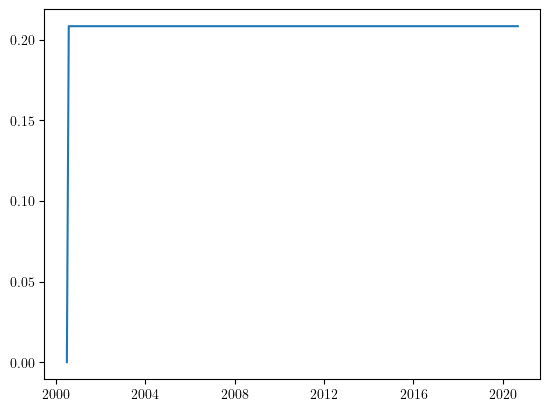

In [53]:
plt.plot(weights_adm.diff().abs().sum(axis = 1))

In [54]:
weights_svm.diff().abs().sum(axis = 1) #turnover limit respected

StartMonth
2000-07-01    0.000000
2000-08-01    0.208333
2000-09-01    0.208333
2000-10-01    0.208333
2000-11-01    0.208333
                ...   
2020-05-01    0.208333
2020-06-01    0.208333
2020-07-01    0.208333
2020-08-01    0.208333
2020-09-01    0.208333
Length: 243, dtype: float64

In [55]:
np.concatenate([wis_adm, np.expand_dims(bias_adm, axis = 1)], axis = 1).shape

(243, 4)

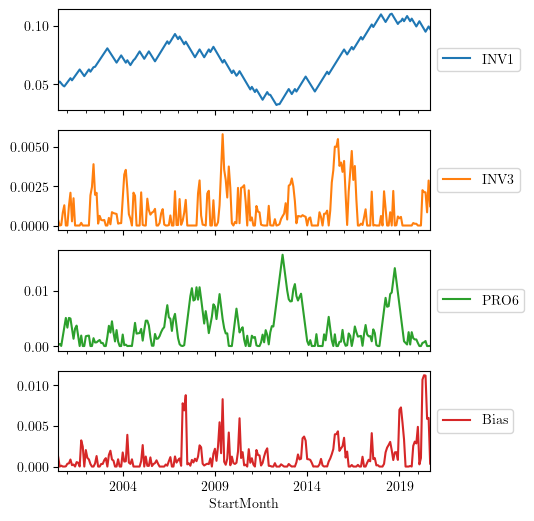

In [56]:
#out_3
#pd.DataFrame(wis_adm, index = weights_svm.index, columns = ['Vol', 'GRW7', 'PRO6', 'INV3', 'LEV5']).plot(subplots = True, legend = True, figsize = (6,9));
pd.DataFrame(np.concatenate([wis_adm, np.expand_dims(bias_adm, axis = 1)], axis = 1), index = weights_svm.index, 
             columns = ['INV1','INV3','PRO6', 'Bias']).plot(subplots = True, legend = True, figsize = (6,6));

for ax in plt.gcf().axes:
  box = ax.get_position()
  ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
  # Put a legend to the right of the current axis
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(img_path + "p13"+turnover+".svg", dpi = dpi_setting)

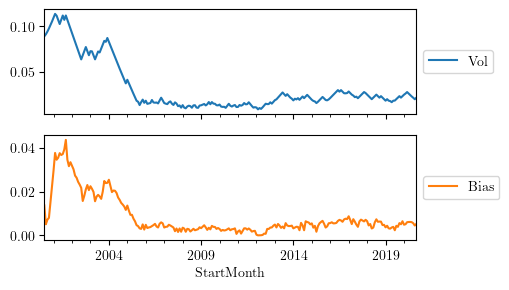

In [57]:
# df = pd.DataFrame(wis_svm, columns= wrds_svm.loc[:,"ROC1":"Vol"].columns, index = weights_svm.index)
# df.mean()
# #plt.legend(['INV3','LEV5']);
# df.ROC1.plot()
bias_svm2 = np.array([bias_svm[i][0] for i in range(len(bias_svm))])
pd.DataFrame(np.concatenate([wis_svm, np.expand_dims(bias_svm2, axis = 1)], axis = 1), index = weights_svm.index, 
             columns = ['Vol', 'Bias']).plot(subplots = True, legend = True, figsize = (6,3));

for ax in plt.gcf().axes:
  box = ax.get_position()
  ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
  # Put a legend to the right of the current axis
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(img_path + "p14"+turnover+".png", dpi = dpi_setting)

In [58]:
bias_svm2 = np.array([bias_svm[i][0] for i in range(len(bias_svm))])